In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [2]:
df = pd.read_csv('archivetemptrain.csv')
df = df.drop_duplicates('review_description')
x_trainingset = df.iloc[:,3].values
y_trainingset = df.iloc[:,-1].values

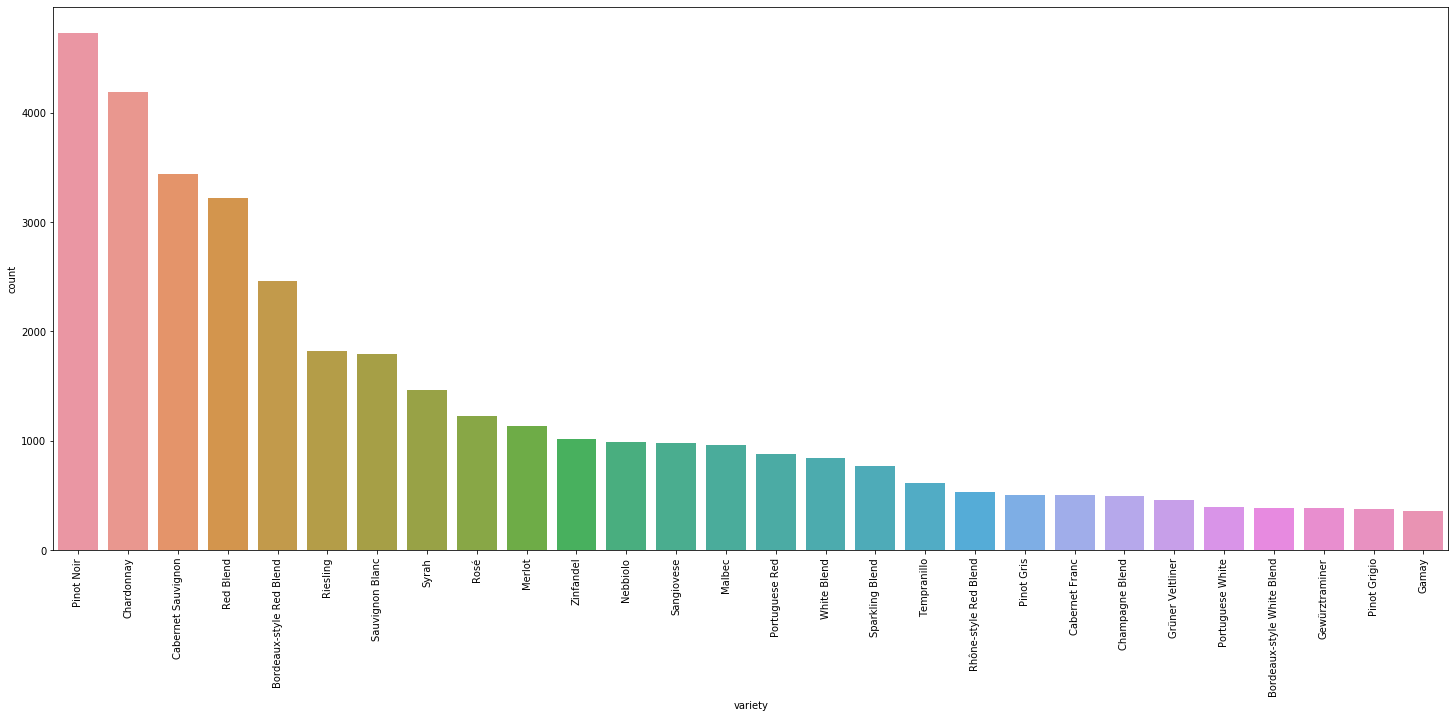

In [3]:
variety_df = df.groupby('variety').filter(lambda x: len(x) > 200)
varieties = variety_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = variety_df['variety'], order = varieties, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [4]:
corpus_train = []
ps = PorterStemmer()
for i in x_trainingset:
    review_description = re.sub('[^a-zA-Z]', ' ', i)
    review_description = review_description.lower()
    review_description = review_description.split(' ')
    review_description = [ps.stem(word) for word in review_description if not word in set(stopwords.words('english'))]
    review_description = ' '.join(review_description)
    corpus_train.append(review_description)

In [ ]:
cv = TfidfVectorizer(min_df=1,stop_words='english')
x_train = cv.fit_transform(corpus_train)
x_train = x_train[:].toarray()

In [6]:
y_train = y_trainingset.reshape(-1,1)
ct = ColumnTransformer(transformers=[('oh', OneHotEncoder(), [0])])
y_train = ct.fit_transform(y_train)
y_train = y_train[:].toarray()

In [7]:
classifier = Sequential()
classifier.add(Dense(output_dim = 256,init='uniform',activation='relu',input_dim = 13543))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 128,init='uniform',activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 64,init='uniform',activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(output_dim = 28,init='uniform',activation='softmax'))
classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=13543, units=256, kernel_initializer="uniform")`
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", units=28, kernel_initializer="uniform")`
  


In [8]:
classifier.fit(x_train[0:30000,:],y_train[0:30000,:],batch_size=80,nb_epoch=10)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
30000/30000 [==============================] - 86s 3ms/step - loss: 2.6272 - accuracy: 0.2123
Epoch 2/10
30000/30000 [==============================] - 57s 2ms/step - loss: 1.7241 - accuracy: 0.4598
Epoch 3/10
30000/30000 [==============================] - 140s 5ms/step - loss: 1.2477 - accuracy: 0.6013
Epoch 4/10
30000/30000 [==============================] - 321s 11ms/step - loss: 0.9622 - accuracy: 0.6914
Epoch 5/10
30000/30000 [==============================] - 103s 3ms/step - loss: 0.7415 - accuracy: 0.7643
Epoch 6/10
30000/30000 [==============================] - 80s 3ms/step - loss: 0.5740 - accuracy: 0.8181
Epoch 7/10
30000/30000 [==============================] - 93s 3ms/step - loss: 0.4435 - accuracy: 0.8608 3s - l
Epoch 8/10
30000/30000 [==============================] - 149s 5ms/step - loss: 0.3425 - accuracy: 0.8931
Epoch 9/10
30000/30000 [==============================] - 174s 6ms/step - loss: 0.2713 - accuracy: 0.9156
Epoch 10/10
30000/30000 [=================

In [9]:
y_trail = classifier.predict(x_train[30000:,:])

In [10]:
y_trail_prediction = []
for i in y_trail:
    for j in range(len(i)):
        if i[j]==max(i):
            y_trail_prediction.append(j)

In [11]:
y_trail_check = df.iloc[30000:,-1].values
labelencoder = LabelEncoder()
y_trail_check[:] = labelencoder.fit_transform(y_trail_check[:])

In [12]:
total = 0
correct = 0
for i in range(len(y_trail_check)):
    if y_trail_check[i]==y_trail_prediction[i]:
        correct+=1
    total+=1
trail_accuracy = (correct/total)

In [13]:
trail_accuracy

0.5857903063425859

# TESTING

In [14]:
testing_set = pd.read_csv('archivetemptest.csv')
x_testing = testing_set.iloc[:,3].values

In [15]:
corpus_test = []
for i in x_testing:
    review_description = re.sub('[^a-zA-Z]', ' ', i)
    review_description = review_description.lower()
    review_description = review_description.split(' ')
    review_description = [ps.stem(word) for word in review_description if not word in set(stopwords.words('english'))]
    review_description = ' '.join(review_description)
    corpus_test.append(review_description)

In [16]:
x_test = cv.transform(corpus_test)
x_test = x_test[:].toarray()

In [17]:
y_pred = classifier.predict(x_test)

In [18]:
y_prediction = []
for i in y_pred:
    for j in range(len(i)):
        if i[j]==max(i):
            y_prediction.append(j)

In [19]:
y_pred_label = labelencoder.inverse_transform(y_prediction)

In [20]:
y_pred_label

array(['Champagne Blend', 'Malbec', 'Chardonnay', ...,
       'Cabernet Sauvignon', 'Syrah', 'Cabernet Sauvignon'], dtype=object)